In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sales = pd.read_csv("supermarket_sales.csv")

In [189]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [190]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [191]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [192]:
sales.shape

(1000, 17)

In [193]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [194]:
sales.describe(include="object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [195]:
#Breaking Date column into Day, Month, and Year
sales['Date'] = pd.to_datetime(sales['Date'])
sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year
DateInfo = sales[['day', 'month', 'year']]
DateInfo

,day,month,year
0,5,1,2019
1,8,3,2019
2,3,3,2019
3,27,1,2019
4,8,2,2019
...,...,...,...
995,29,1,2019
996,2,3,2019
997,9,2,2019
998,22,2,2019


In [196]:
#Convert Time column to Hour
sales['Time'] = pd.to_datetime(sales['Time'])
sales['hour'] = (sales['Time']).dt.hour
sales['hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: hour, Length: 1000, dtype: int64

In [197]:
#Grouping gender counts by Branch
sales.groupby(['Branch', 'Gender'])['Invoice ID'].count().to_frame()

Invoice ID
Branch Gender            
A      Female         161
       Male           179
B      Female         162
       Male           170
C      Female         178
       Male           150

In [198]:
#See list of columns that contain objects
objects = [name for name in sales.columns if sales[name].dtype == 'object']
objects

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [199]:
# number of unique values in "objects" column
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print(len(sales['City'].unique().tolist()))
print(len(sales['Customer type'].unique().tolist()))
print(len(sales['Gender'].unique().tolist()))
print(len(sales['Product line'].unique().tolist()))
print(len(sales['Payment'].unique().tolist()))


# unique values in Branch: 3
3
2
2
6
3


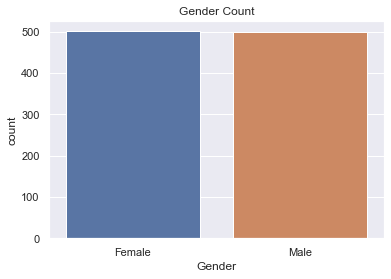

In [200]:
sns.set(style="darkgrid")
genderCount = sns.countplot (x="Gender", data = sales).set_title("Gender Count")

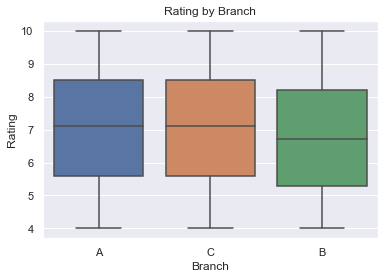

In [201]:
sns.set(style="darkgrid")
rating = sns.boxplot (x="Branch", y="Rating", data=sales).set_title("Rating by Branch")

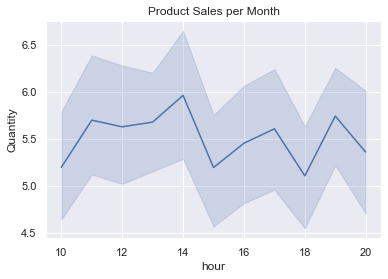

In [202]:
#product sales by hour
productsales = sns.lineplot(x="hour", y="Quantity", data=sales).set_title("Product Sales per Month")

Text(0.5, 1.0, 'Categorical Sales')

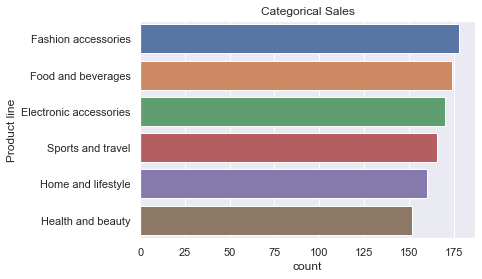

In [203]:
#Categorical Sales Chart
sns.countplot(y="Product line", data = sales, order = sales['Product line'].value_counts().index).set_title("Categorical Sales")

Text(0.5, 1.0, 'Payment type count')

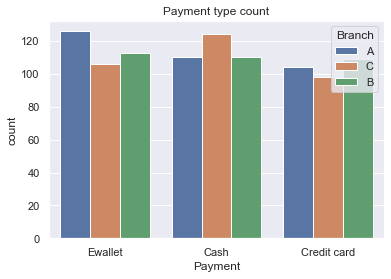

In [204]:
#Payment type chart
sns.countplot(x="Payment", hue = "Branch", data=sales).set_title('Payment type count')

In [205]:
sales.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Text(0.5, 1.0, 'Total sales by Customer Type')

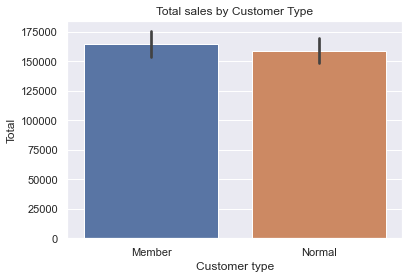

In [206]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales).set_title("Total sales by Customer Type")

In [207]:
#Total sale amount
print("Total sale is : ",sales['Total'].sum())

Total sale is :  322966.749


In [208]:
#Total sales by Branches
print("Total Sales by Branches", "\n")
sales.groupby(["Branch"])['Total'].sum().to_frame()

Total Sales by Branches 



,Total
Branch,
A,106200.3705
B,106197.6720
C,110568.7065


In [209]:
#Total sales by Branches and Months
print("Total Sales by Branches and Months", "\n")
sales.groupby(['Branch','month'])['Total'].sum().to_frame()

Total Sales by Branches and Months 



Total
Branch month            
A      1      38681.1285
       2      29860.1205
       3      37659.1215
B      1      37176.0585
       2      34424.2710
       3      34597.3425
C      1      40434.6810
       2      32934.9825
       3      37199.0430

In [210]:
sales.groupby(['Branch'])['Total'].agg(['max','min','mean'])

,max,min,mean
Branch,,,
A,1039.29,12.6945,312.354031
B,1022.49,18.6375,319.872506
C,1042.65,10.6785,337.099715


In [223]:
#Sales count by product line for each Branches
sales.sort_values(['Product line']).groupby(['Branch'])['Product line'].value_counts().to_frame()

Product line
Branch Product line                        
A      Home and lifestyle                65
       Electronic accessories            60
       Sports and travel                 59
       Food and beverages                58
       Fashion accessories               51
       Health and beauty                 47
B      Fashion accessories               62
       Sports and travel                 62
       Electronic accessories            55
       Health and beauty                 53
       Food and beverages                50
       Home and lifestyle                50
C      Food and beverages                66
       Fashion accessories               65
       Electronic accessories            55
       Health and beauty                 52
       Home and lifestyle                45
       Sports and travel                 45

In [230]:
#Total sales by product line
sales.groupby(['Product line'])['Total'].sum().to_frame()

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [229]:
#Highest, lowest and average rating by Branch
sales.groupby(['Branch'])['Rating'].agg(['max','min','mean'])

,max,min,mean
Branch,,,
A,10.0,4.0,7.027059
B,10.0,4.0,6.818072
C,10.0,4.0,7.072866


In [262]:
maxrating = sales[sales['Rating']==10.0]
print(len(sales[sales['Rating']==10.0]), "customers had given 10 rating")
print((len(sales[sales['Rating']==10.0])*100.0)/sales['Rating'].count(), "% of customers had given 10 rating", "\n")
minrating = sales[sales['Rating']==4.0]
print(len(sales[sales['Rating']==4.0]), "customers had given 4 rating")
print((len(sales[sales['Rating']==4.0])*100.0)/sales['Rating'].count(), "% of customers had given 4 rating", "\n")
rating8 = sales[sales['Rating']>=8.0]
print(len(sales[sales['Rating']>=8.0]), "customers had given equal or greater than 8 rating")
print((len(sales[sales['Rating']>=8.0])*100.0)/sales['Rating'].count(), "% of customers had given equal or greater than 8 rating")

5 customers had given 10 rating
0.5 % of customers had given 10 rating 

11 customers had given 4 rating
1.1 % of customers had given 4 rating 

329 customers had given equal or greater than 8 rating
32.9 % of customers had given equal or greater than 8 rating
